In [1]:
#Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load the data
cars = pd.read_csv("CarPrice_Assignment.csv")


In [5]:
cars.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
cars.shape

(205, 26)

In [7]:
cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [8]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
#Preprocessing

# spliting company name from car name
CompanyName = cars["CarName"].apply(lambda x: x.split(' ')[0]) # [0] denotes taking first part after spliting the name.
cars.insert(3, "CompanyName", CompanyName) # inserting CompanyName column at index position 3
cars.drop(["CarName"], axis=1, inplace=True) # droping CarName column from the dataset
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
cars.drop(['car_ID'],axis=1, inplace=True)
cars.columns

Index(['symboling', 'CompanyName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [12]:
# checking (unique) barnd names and fixing it
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [13]:
cars.CompanyName = cars.CompanyName.str.lower()

cars.CompanyName.replace("maxda","mazda",inplace=True)
cars.CompanyName.replace("Nissan","nissan",inplace=True)
cars.CompanyName.replace("porsche","porcshce",inplace=True)
cars.CompanyName.replace("toyota","toyouta",inplace=True)
cars.CompanyName.replace("vokswagen","volkswagen",inplace=True)

In [14]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porcshce', 'renault', 'saab',
       'subaru', 'toyouta', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [15]:
# checking the duplicates
cars.loc[cars.duplicated()]

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


<ipython-input-16-a113cc765a26>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars.price)


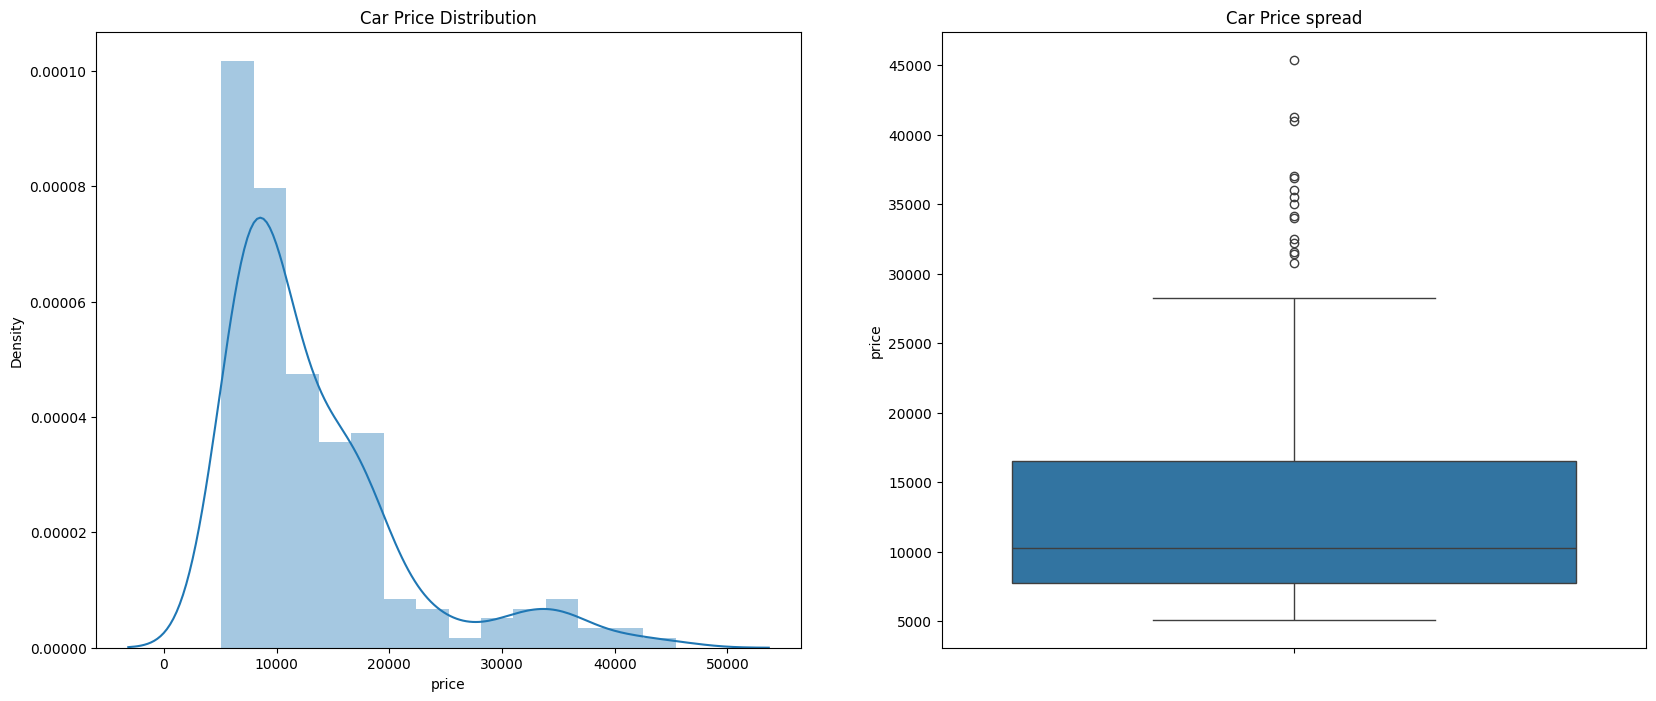

In [16]:
#Ananysis Visualization

# univariate analysis / univariate explorator data analysis
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Car Price Distribution")
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title("Car Price spread")
sns.boxplot(y=cars.price)

plt.show()

In [17]:
print(cars.price.describe(percentiles=[0,0.25,0.5,0.75,0.85,0.90,1.0]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
0%        5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


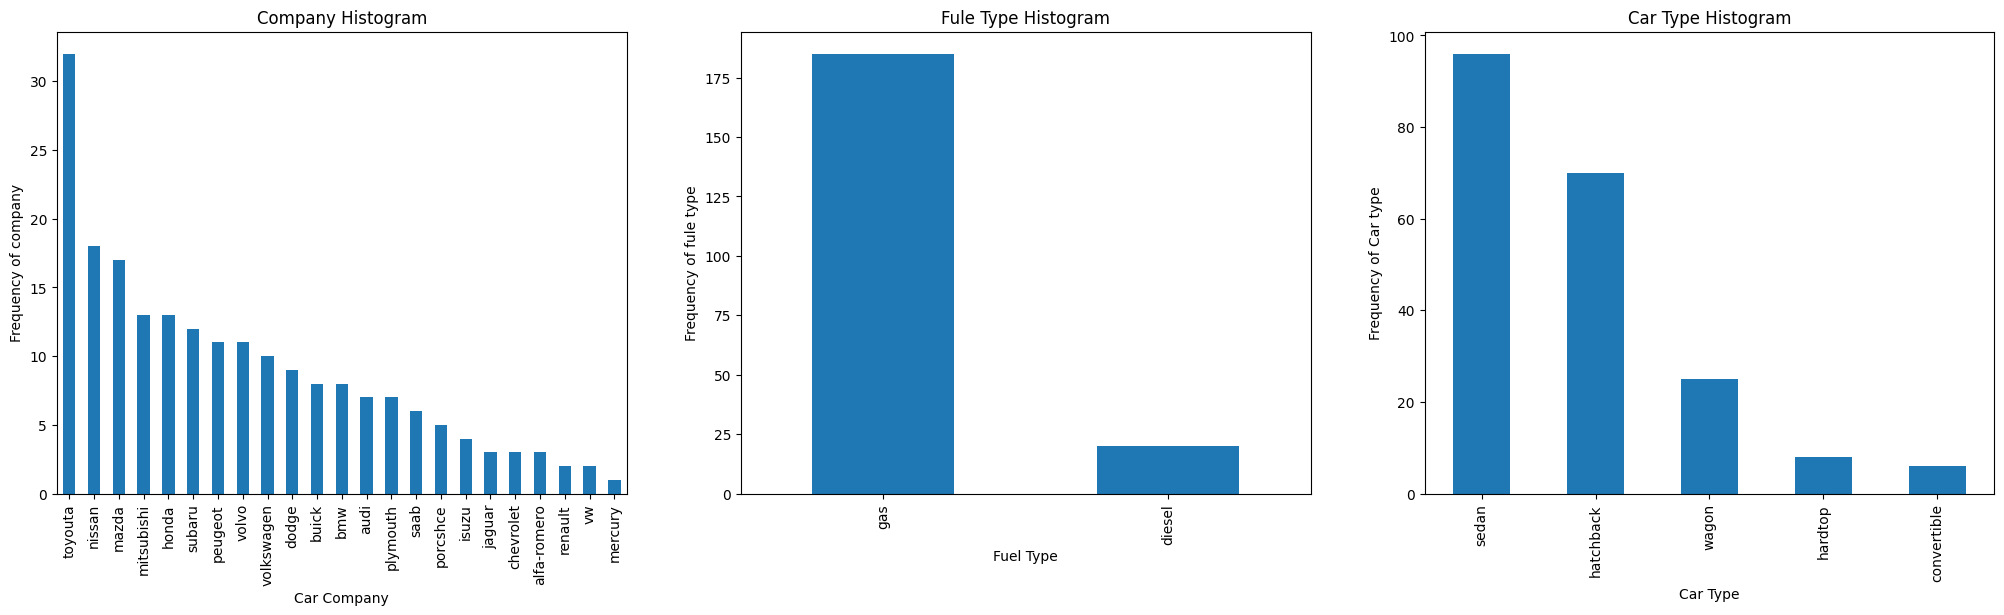

In [18]:
#Determine the number of cars per - company, fuletype, cartype
plt.figure(figsize = (25,6))

# way1
plt.subplot(1,3,1)
plt.title("Company Histogram")
plt.xlabel("Car Company")
plt.ylabel("Frequency of company")
cars.CompanyName.value_counts().plot(kind="bar")

#way2
plt.subplot(1,3,2)
plt.title("Fule Type Histogram")
plt2 = cars.fueltype.value_counts().plot(kind="bar")
plt2.set(xlabel="Fuel Type", ylabel="Frequency of fule type")

plt.subplot(1,3,3)
plt.title("Car Type Histogram")
plt3 = cars.carbody.value_counts().plot(kind ="bar")
plt3.set(xlabel="Car Type", ylabel="Frequency of Car type")

plt.show()

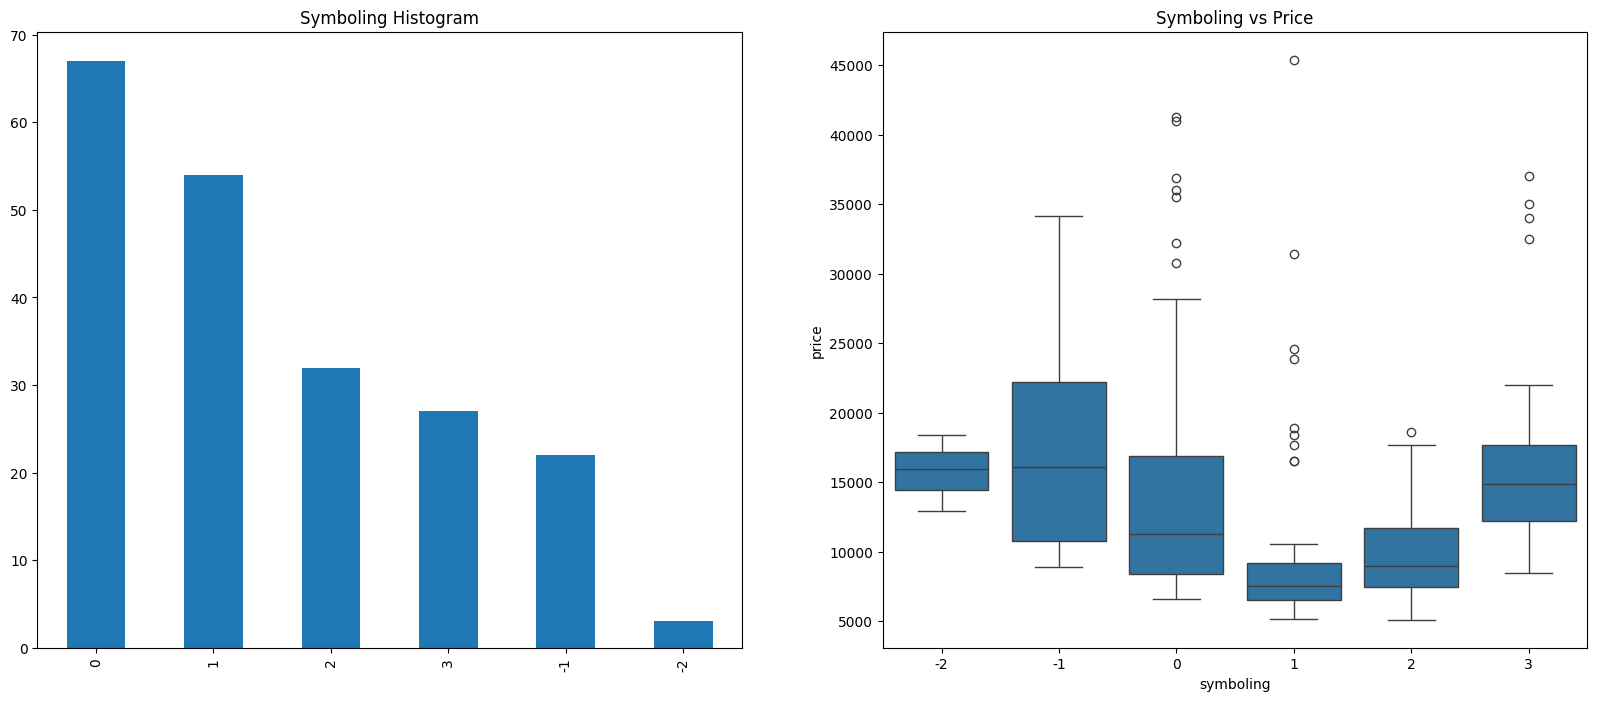

In [19]:
#Determinie Count/Frequency and Distribution/spread of price value per Symboling catogary
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Symboling Histogram")
cars.symboling.value_counts().plot(kind='bar')

plt.subplot(1,2,2)
plt.title("Symboling vs Price")
sns.boxplot(x=cars.symboling, y=cars.price)

plt.show()

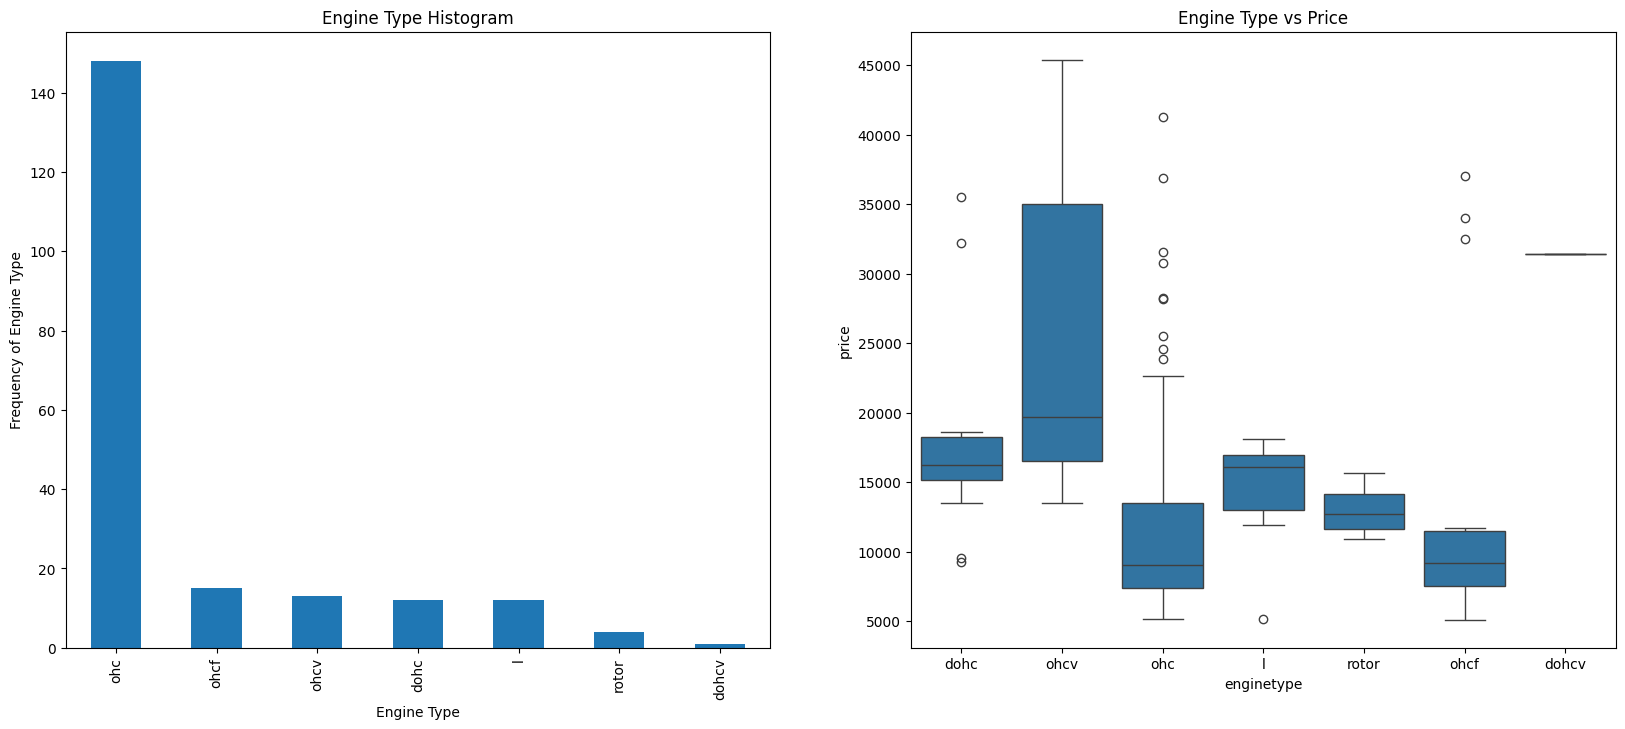

In [20]:
#Determine count/frequency and distribution/spread of price value per engine type
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Engine Type Histogram")
plt1 = cars.enginetype.value_counts().plot(kind="bar")
plt1.set(xlabel="Engine Type", ylabel="Frequency of Engine Type")

plt.subplot(1,2,2)
plt.title("Engine Type vs Price")
sns.boxplot(x=cars.enginetype, y=cars.price)
plt.show()

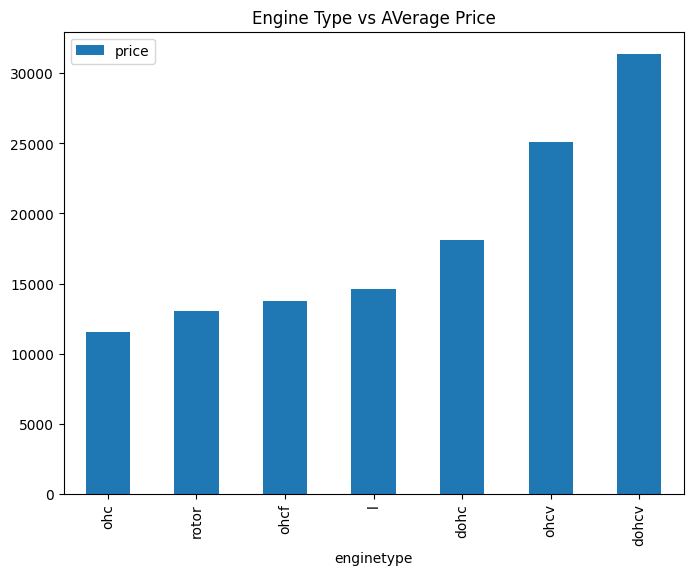

In [21]:
#Determining average price per engine type
df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values())
df.plot.bar(figsize=(8,6))
plt.title("Engine Type vs AVerage Price")
plt.show()

<Figure size 1000x300 with 0 Axes>

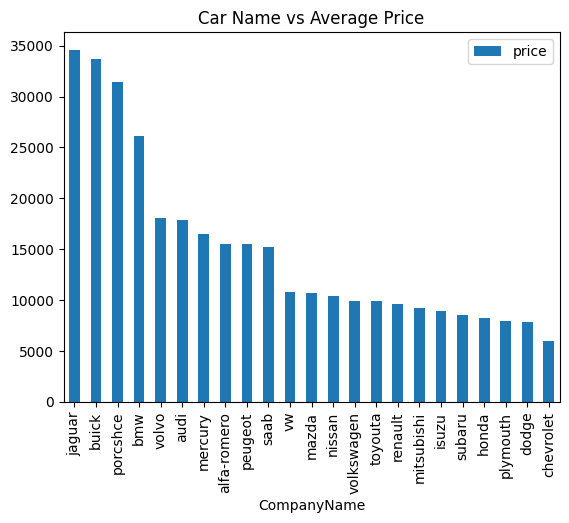

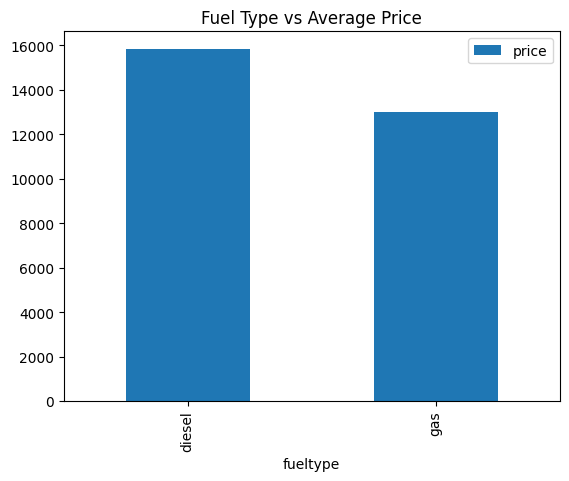

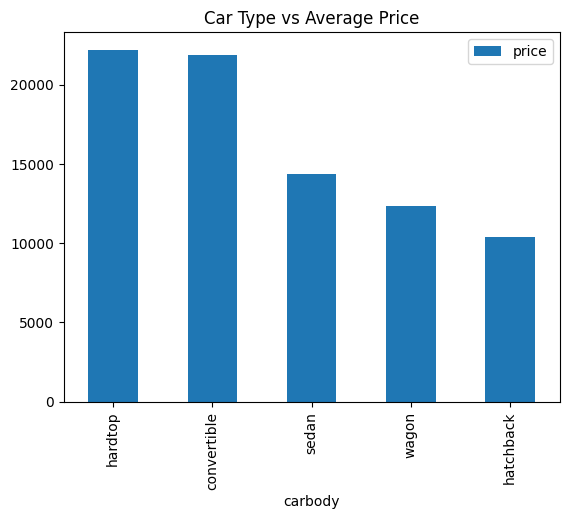

In [22]:
#Determine average car price per company, fueltype, cartype
plt.figure(figsize=(10,3))

df = pd.DataFrame(cars.groupby(["CompanyName"])["price"].mean().sort_values(ascending=False))
df.plot.bar()
plt.title("Car Name vs Average Price")

df = pd.DataFrame(cars.groupby(["fueltype"])["price"].mean().sort_values(ascending=False))
df.plot.bar()
plt.title("Fuel Type vs Average Price")

df = pd.DataFrame(cars.groupby(["carbody"])["price"].mean().sort_values(ascending=False))
df.plot.bar()
plt.title("Car Type vs Average Price")

plt.show()

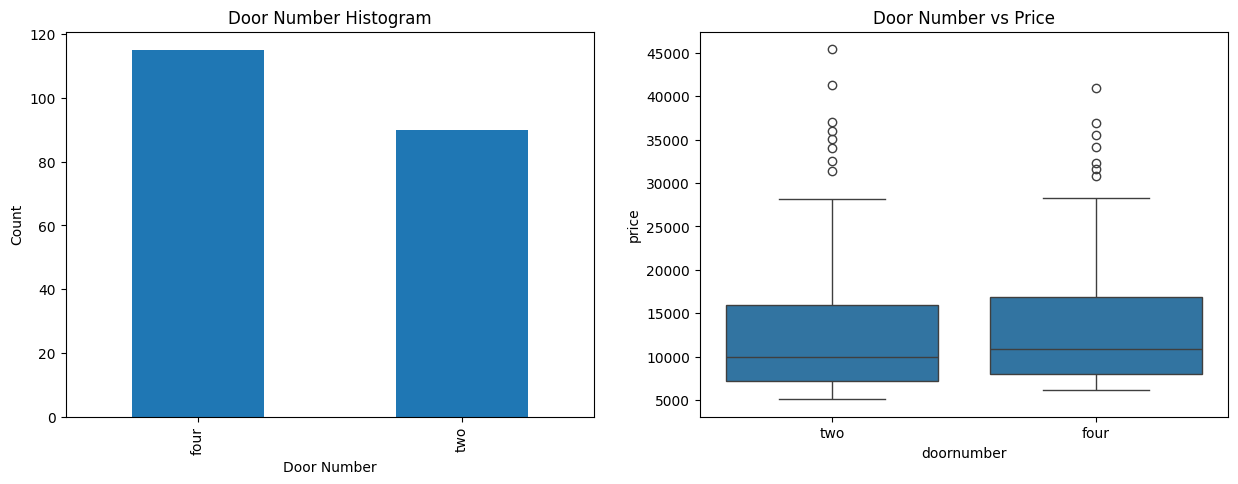

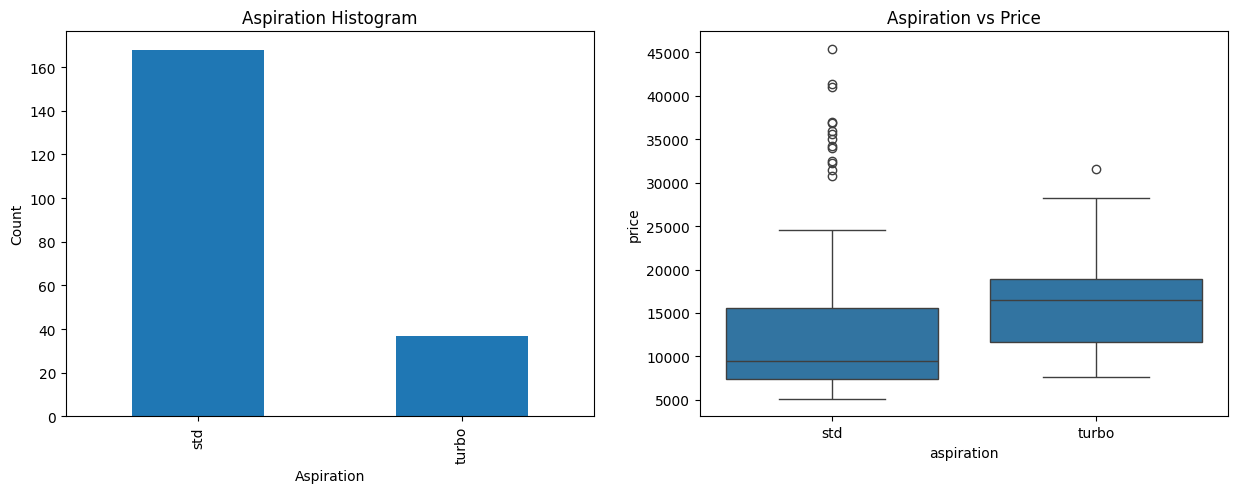

In [23]:
#For Aspiration and Door Number, Count and Price Distribution
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Door Number Histogram")
plt1 = cars.doornumber.value_counts().plot(kind="bar")
plt1.set(xlabel="Door Number", ylabel="Count")

plt.subplot(1,2,2)
plt.title("Door Number vs Price")
sns.boxplot(x=cars.doornumber, y=cars.price)
plt.show()


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Aspiration Histogram")
plt1 = cars.aspiration.value_counts().plot(kind="bar")
plt1.set(xlabel="Aspiration", ylabel="Count")

plt.subplot(1,2,2)
plt.title("Aspiration vs Price")
sns.boxplot(x=cars.aspiration, y=cars.price)
plt.show()

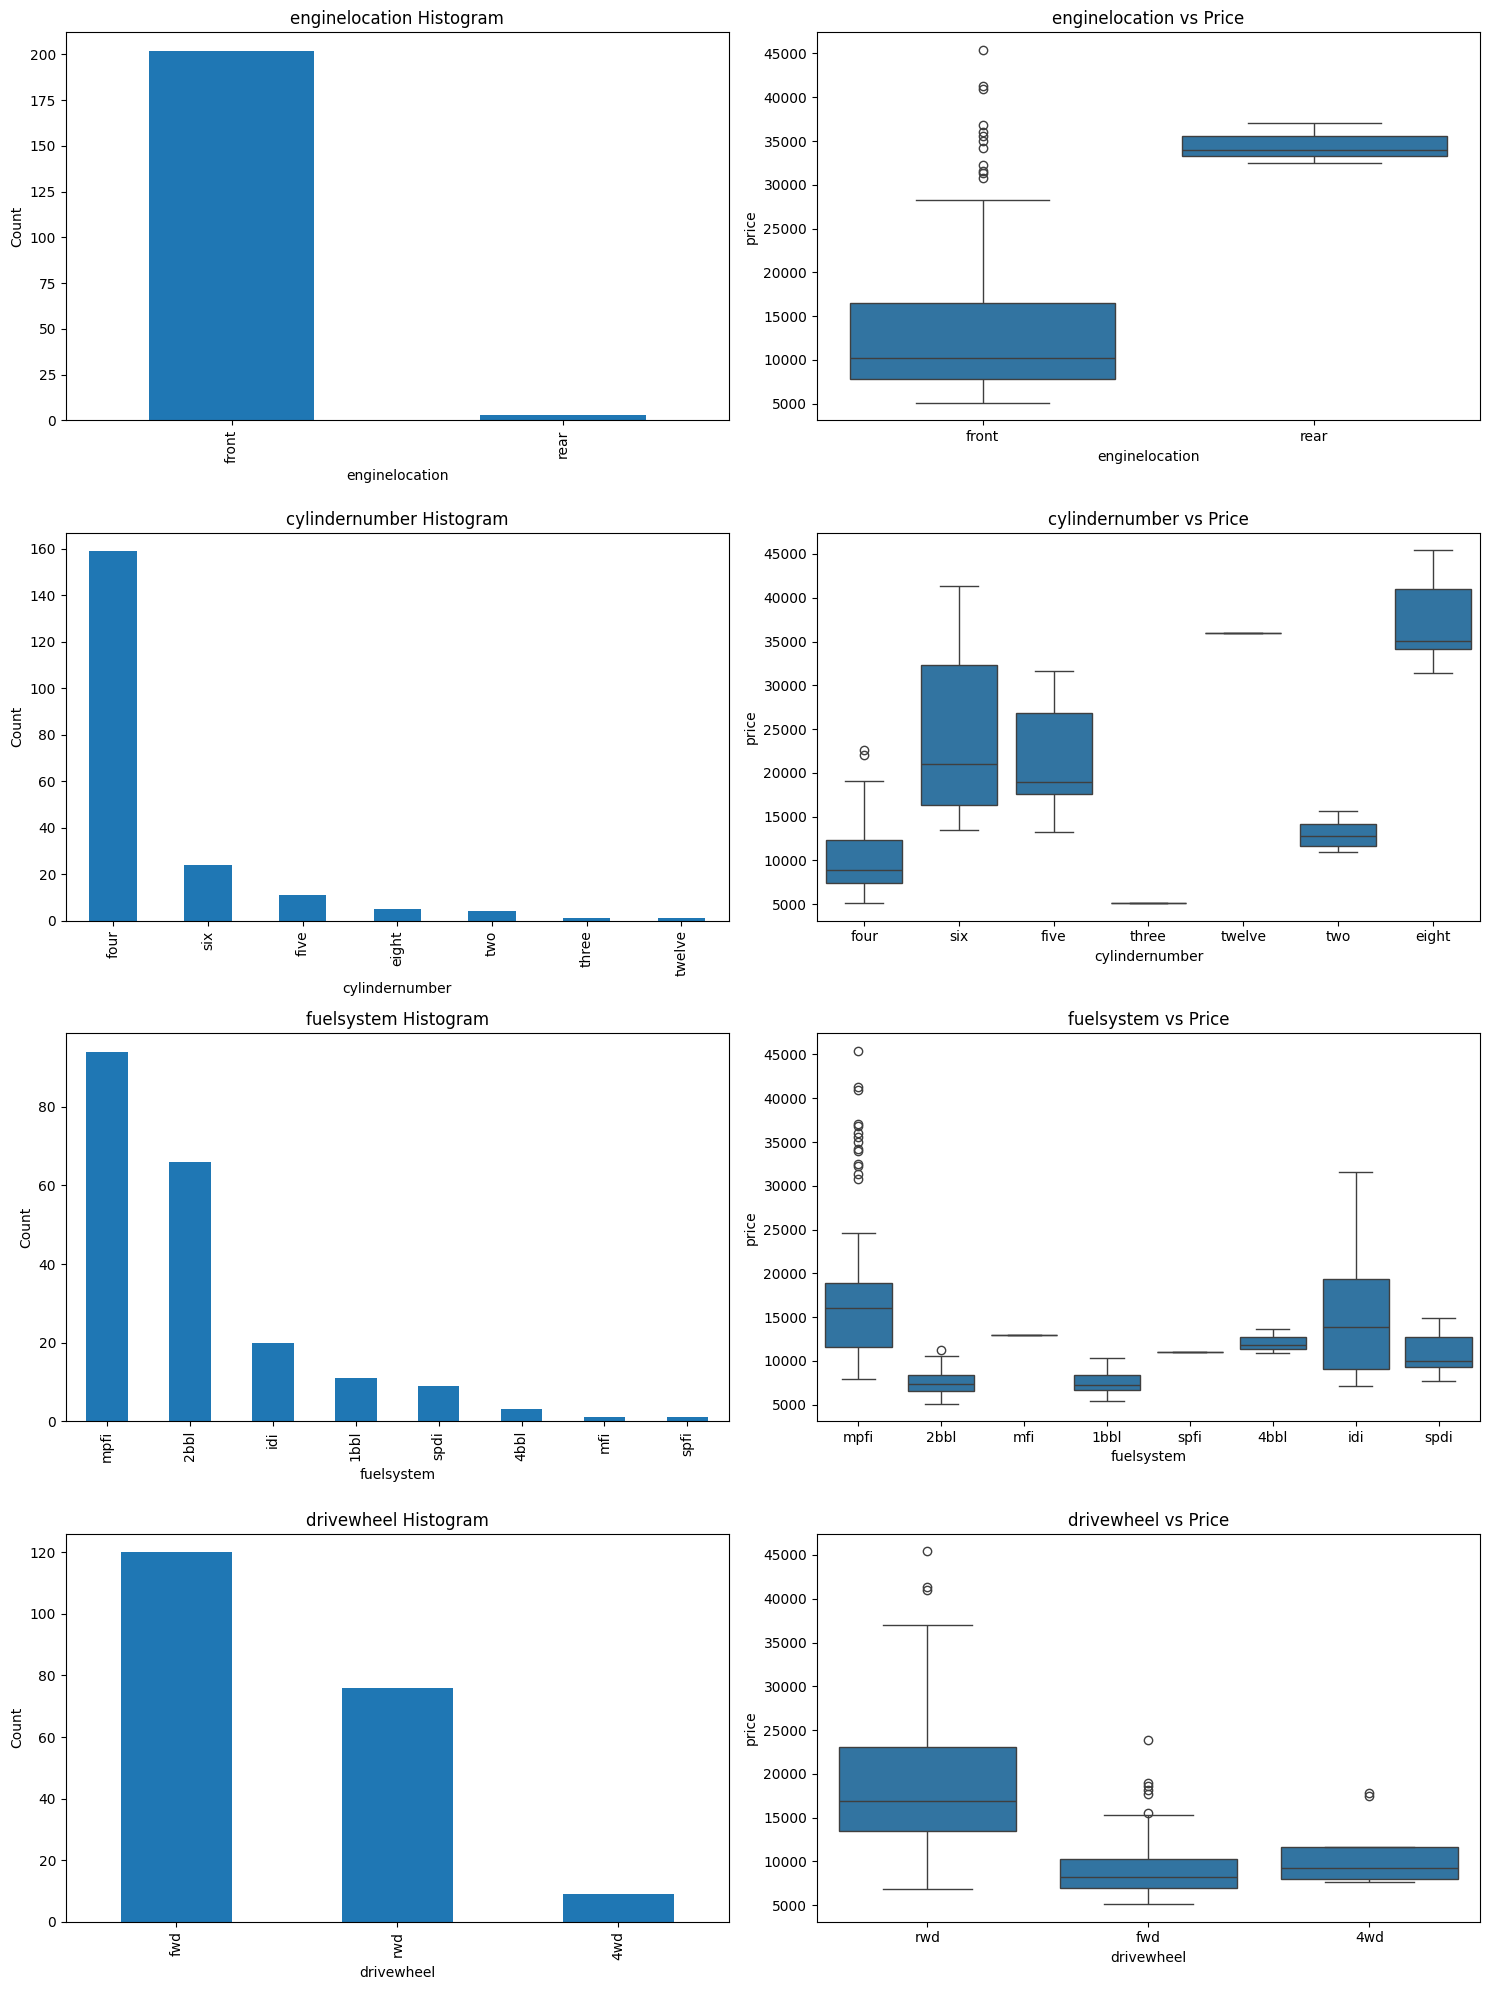

In [24]:
#For EngineLocation, CylinderNumber and Drivewheel, count and price distribution
def plot_count(x, fig):
    plt.subplot(4,2,fig)
    plt.title(x+" Histogram")
    plt1 = cars[x].value_counts().plot(kind="bar")
    plt1.set(xlabel=x+"", ylabel="Count")

    plt.subplot(4,2,fig+1)
    plt.title(x+" vs Price")
    sns.boxplot(x=cars[x], y=cars.price)

plt.figure(figsize=(15,20))

plot_count('enginelocation',1)
plot_count('cylindernumber',3)
plot_count('fuelsystem',5)
plot_count('drivewheel',7)

plt.tight_layout()

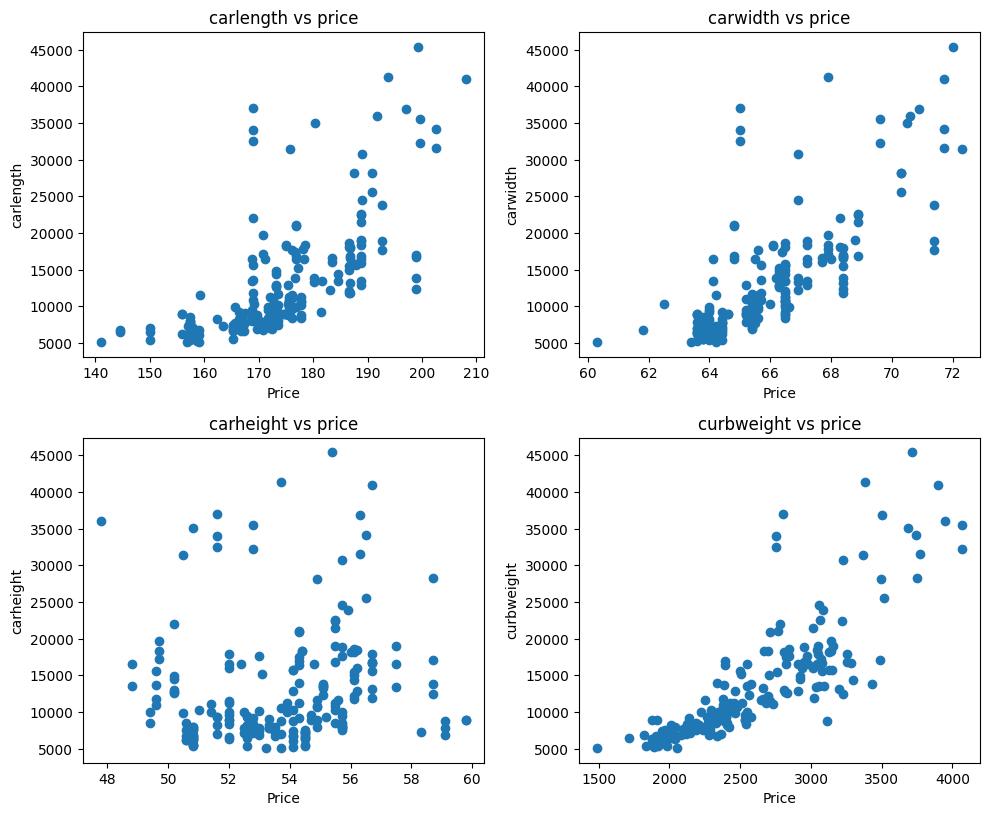

In [25]:
#Visualising Numerical Data

# finding the correlation between Price and carlength, Carwidth, Carheight, Carweight using Scatterplot
def scatter_plot(x, fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+" vs price")
    plt.xlabel("Price")
    plt.ylabel(x+"")

plt.figure(figsize=(10,20))

scatter_plot('carlength', 1)
scatter_plot('carwidth', 2)
scatter_plot('carheight', 3)
scatter_plot('curbweight', 4)

plt.tight_layout()

In [26]:
#Feature Engineering

# Fuel Economy = 0.55 x citympg  +  0.45 x highwaympg

cars['fueleconomy'] = ((0.55 * cars['citympg']) + (0.45 * cars['highwaympg']))
cars.drop(['citympg', 'highwaympg'], axis=1, inplace=True)

In [27]:
cars

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,fueleconomy
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,23.70
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,23.70
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,22.15
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,26.70
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,19.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,four,141,mpfi,3.78,3.15,9.5,114,5400,16845.0,25.25
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,four,141,mpfi,3.78,3.15,8.7,160,5300,19045.0,21.70
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,six,173,mpfi,3.58,2.87,8.8,134,5500,21485.0,20.25
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,six,145,idi,3.01,3.40,23.0,106,4800,22470.0,26.45


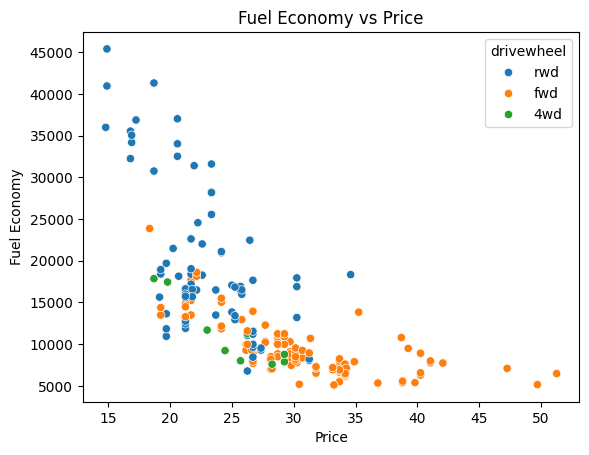

<Figure size 640x480 with 0 Axes>

In [28]:
#Another Bivariate Data analysis

# relationship between fuel economy and price. Third dimension - Drive wheel
plt.title("Fuel Economy vs Price")
sns.scatterplot(x=cars.fueleconomy, y=cars.price, hue=cars.drivewheel)
plt.xlabel("Price")
plt.ylabel("Fuel Economy")

plt.show()
plt.tight_layout()

In [29]:
#Finding Highly Correlations between Features

cor = cars.corr()
cor

<ipython-input-29-0771a6f86d67>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = cars.corr()


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,fueleconomy
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.079978,-0.003257
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,0.577816,-0.508136
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,0.682920,-0.691472
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,0.759325,-0.663419
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,0.119336,-0.076356
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,0.835305,-0.781535
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,0.874145,-0.669464
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,0.553173,-0.589898
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,0.079443,-0.043281
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.067984,0.299310


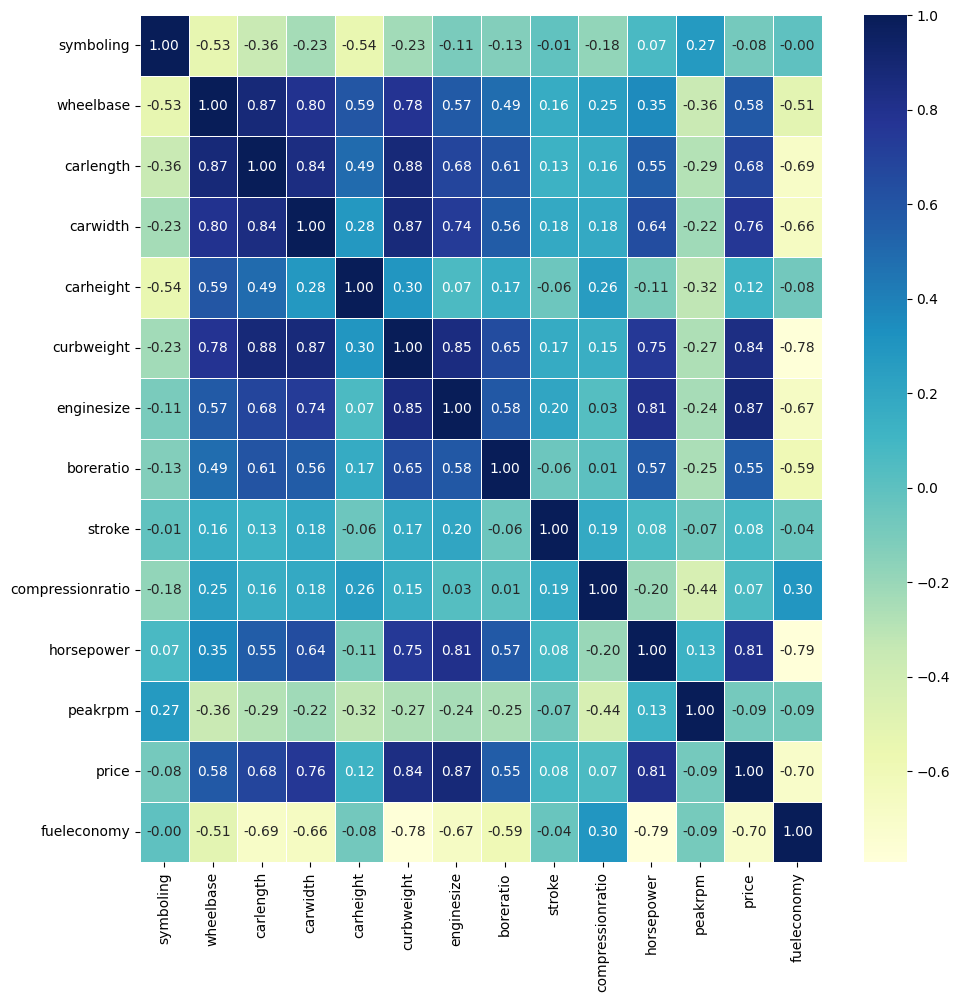

In [30]:
# producing a heatmap for the same thing

plt.figure(figsize=(11,11))
sns.heatmap(cor,annot=True,linewidths=.5, fmt=".2f", cmap="YlGnBu")
plt.show()
# annot is use to add numbered title in each box
# linewidths add white line aroung each box

In [31]:
cars.drop(['symboling', 'carheight', 'stroke', 'compressionratio', 'peakrpm'], axis=1, inplace=True)

In [32]:
#Featuring Engineering: Creating dummy Variables for Ordinal Variables

print(1,cars['fueltype'].unique())
print(2,cars['aspiration'].unique())
print(3,cars['drivewheel'].unique())
print(4,cars['enginetype'].unique())
print(5,cars['cylindernumber'].unique())
print(6,cars['fuelsystem'].unique())
print(7,cars['doornumber'].unique())
print(8,cars['enginelocation'].unique())
print(9,cars['CompanyName'].unique())

1 ['gas' 'diesel']
2 ['std' 'turbo']
3 ['rwd' 'fwd' '4wd']
4 ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
5 ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
6 ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
7 ['two' 'four']
8 ['front' 'rear']
9 ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porcshce' 'renault' 'saab' 'subaru' 'toyouta' 'volkswagen' 'vw' 'volvo']


In [33]:
# here we can see that 'two' and 'four' is exeist in both cylindernumber and doornumber.
# we will convert two-> dtwo and four -> dfour in doornumber to differensiate those values
cars.doornumber = list(map(lambda x: "d"+x, cars.doornumber))

In [34]:
cars.doornumber

0       dtwo
1       dtwo
2       dtwo
3      dfour
4      dfour
       ...  
200    dfour
201    dfour
202    dfour
203    dfour
204    dfour
Name: doornumber, Length: 205, dtype: object

In [35]:
def dummies(x, df):
    temp = pd.get_dummies(df[x], drop_first=True)
    df = pd.concat([df, temp], axis=1)
    df.drop([x], axis=1, inplace=True)
    return df

cars_f = cars
cars_f = dummies('fueltype', cars_f)
cars_f = dummies('aspiration', cars_f)
cars_f = dummies('carbody', cars_f)
cars_f = dummies('drivewheel', cars_f)
cars_f = dummies('enginetype', cars_f)
cars_f = dummies('cylindernumber', cars_f)
cars_f = dummies('CompanyName', cars_f)
cars_f = dummies('doornumber', cars_f)
cars_f = dummies('enginelocation', cars_f)
cars_f = dummies('fuelsystem', cars_f)

In [36]:
print(cars_f.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 60 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   wheelbase    205 non-null    float64
 1   carlength    205 non-null    float64
 2   carwidth     205 non-null    float64
 3   curbweight   205 non-null    int64  
 4   enginesize   205 non-null    int64  
 5   boreratio    205 non-null    float64
 6   horsepower   205 non-null    int64  
 7   price        205 non-null    float64
 8   fueleconomy  205 non-null    float64
 9   gas          205 non-null    uint8  
 10  turbo        205 non-null    uint8  
 11  hardtop      205 non-null    uint8  
 12  hatchback    205 non-null    uint8  
 13  sedan        205 non-null    uint8  
 14  wagon        205 non-null    uint8  
 15  fwd          205 non-null    uint8  
 16  rwd          205 non-null    uint8  
 17  dohcv        205 non-null    uint8  
 18  l            205 non-null    uint8  
 19  ohc     

In [37]:
cars_f.shape

(205, 60)

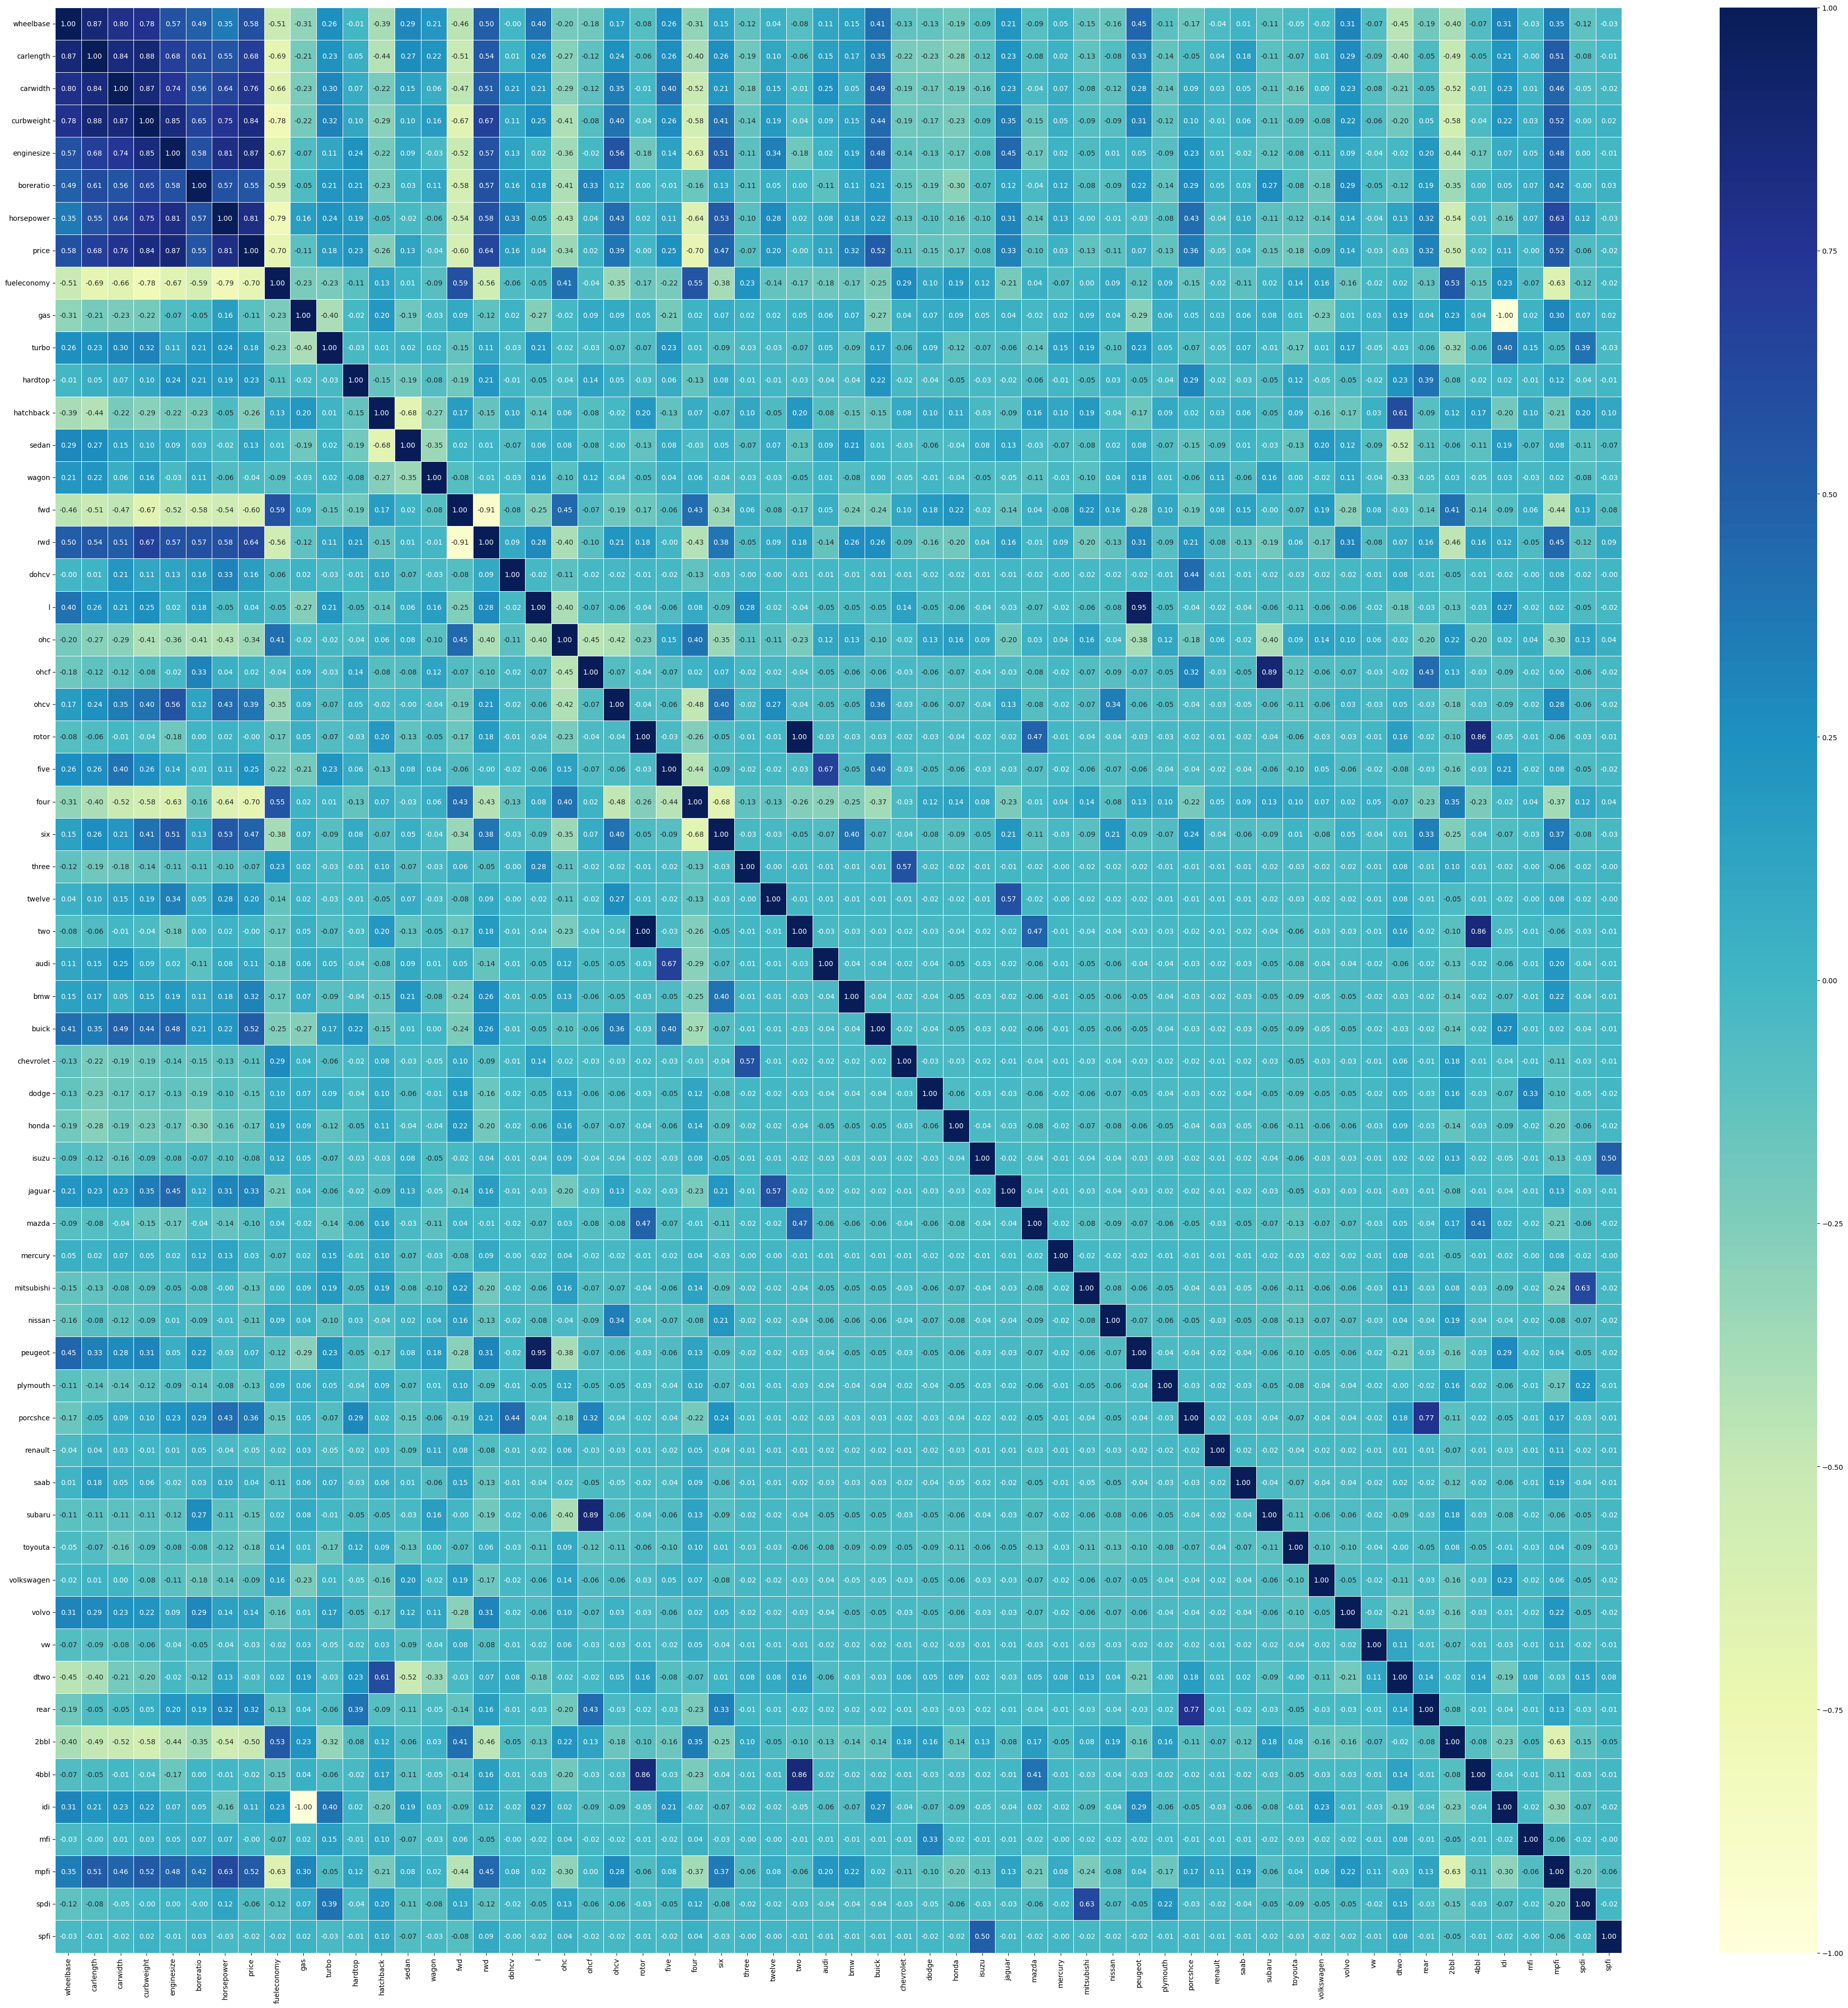

In [38]:
cor_new = cars_f.corr()
plt.figure(figsize=(50,50))
sns.heatmap(cor_new,annot=True,linewidths=.5, fmt=".2f", cmap="YlGnBu")
plt.show()

In [39]:
cars_f.drop(['wagon', 'l', 'ohcf', 'rotor', 'three', 'two',
       'isuzu', 'mercury', 'peugeot', 'renault', 'saab', 'subaru',
       'toyouta', 'volkswagen', 'volvo', 'vw', 'dtwo', '4bbl',
       'idi', 'mfi', 'spdi', 'spfi'], axis=1, inplace=True)

In [40]:
#Train - Test Split and Feature Scaling

from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_f, train_size=0.7, test_size=0.3, random_state=100)

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 38 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   wheelbase    143 non-null    float64
 1   carlength    143 non-null    float64
 2   carwidth     143 non-null    float64
 3   curbweight   143 non-null    int64  
 4   enginesize   143 non-null    int64  
 5   boreratio    143 non-null    float64
 6   horsepower   143 non-null    int64  
 7   price        143 non-null    float64
 8   fueleconomy  143 non-null    float64
 9   gas          143 non-null    uint8  
 10  turbo        143 non-null    uint8  
 11  hardtop      143 non-null    uint8  
 12  hatchback    143 non-null    uint8  
 13  sedan        143 non-null    uint8  
 14  fwd          143 non-null    uint8  
 15  rwd          143 non-null    uint8  
 16  dohcv        143 non-null    uint8  
 17  ohc          143 non-null    uint8  
 18  ohcv         143 non-null    uint8  
 19  five    

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'fueleconomy']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [43]:
df_train

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,fueleconomy,gas,...,honda,jaguar,mazda,mitsubishi,nissan,plymouth,porcshce,rear,2bbl,mpfi
122,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,7609.0,0.530864,1,...,0,0,0,0,0,1,0,0,1,0
125,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,22018.0,0.213992,1,...,0,0,0,0,0,0,1,0,0,1
166,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,9538.0,0.344307,1,...,0,0,0,0,0,0,0,0,0,1
1,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,16500.0,0.244170,1,...,0,0,0,0,0,0,0,0,0,1
199,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,18950.0,0.122085,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.334483,0.508943,0.425000,0.354926,0.184906,0.388889,0.283333,9279.0,0.311385,1,...,0,0,0,1,0,0,0,0,0,0
103,0.475862,0.707317,0.516667,0.609775,0.452830,0.595238,0.433333,13499.0,0.189300,1,...,0,0,0,0,1,0,0,0,0,1
67,0.806897,0.809756,0.833333,0.786268,0.460377,0.714286,0.312500,25552.0,0.234568,0,...,0,0,0,0,0,0,0,0,0,0
24,0.244828,0.263415,0.291667,0.185803,0.109434,0.230159,0.083333,6229.0,0.530864,1,...,0,0,0,0,0,0,0,0,1,0


In [44]:
df_train.describe()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,fueleconomy,gas,...,honda,jaguar,mazda,mitsubishi,nissan,plymouth,porcshce,rear,2bbl,mpfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.407878,0.241351,0.497946,0.227302,13056.347322,0.358265,0.909091,...,0.062937,0.020979,0.090909,0.062937,0.097902,0.027972,0.020979,0.006993,0.349650,0.440559
std,0.205581,0.204848,0.184517,0.211269,0.154619,0.207140,0.165511,7807.036883,0.185980,0.288490,...,0.243703,0.143818,0.288490,0.243703,0.298227,0.165472,0.143818,0.083624,0.478536,0.498199
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5118.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.245539,0.135849,0.305556,0.091667,7554.000000,0.198903,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.341379,0.502439,0.425000,0.355702,0.184906,0.500000,0.191667,10198.000000,0.344307,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.503448,0.669919,0.550000,0.559542,0.301887,0.682540,0.283333,16465.000000,0.512346,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,41315.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
# Dividing Train data into X and Y

y_train = df_train.pop('price')
x_train = df_train

In [46]:
y_train, x_train

(122     7609.0
 125    22018.0
 166     9538.0
 1      16500.0
 199    18950.0
         ...   
 87      9279.0
 103    13499.0
 67     25552.0
 24      6229.0
 8      23875.0
 Name: price, Length: 143, dtype: float64,
      wheelbase  carlength  carwidth  curbweight  enginesize  boreratio  \
 122   0.244828   0.426016  0.291667    0.272692    0.139623   0.230159   
 125   0.272414   0.452033  0.666667    0.500388    0.339623   1.000000   
 166   0.272414   0.448780  0.308333    0.314973    0.139623   0.444444   
 1     0.068966   0.450407  0.316667    0.411171    0.260377   0.626984   
 199   0.610345   0.775610  0.575000    0.647401    0.260377   0.746032   
 ..         ...        ...       ...         ...         ...        ...   
 87    0.334483   0.508943  0.425000    0.354926    0.184906   0.388889   
 103   0.475862   0.707317  0.516667    0.609775    0.452830   0.595238   
 67    0.806897   0.809756  0.833333    0.786268    0.460377   0.714286   
 24    0.244828   0.263415  0.2

In [47]:
#Model Building

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [49]:
def built_model(X,y):

    # Adding the constants
    X = sm.add_constant(X)
    # This will add a constant feature in X dataframe with all value fill with 1.
    # This helps to calculate bias parameter(theta-0).

    # Fitting the model, using OLS algorithm.
    lm = sm.OLS(y,X).fit()
    # Model name is 'lm'
    # fit is used to built model using x and y. if fit method is not use thrn only Model Object is created using OLS().

    # prints model summary
    print(lm.summary())

    return lm

In [50]:
#creating first model and clean up features with colinearity.
model1 = built_model(x_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     55.28
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           8.28e-54
Time:                        19:53:38   Log-Likelihood:                -1268.2
No. Observations:                 143   AIC:                             2612.
Df Residuals:                     105   BIC:                             2725.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7305.7113   3113.062      2.347      

In [51]:
x_train.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'fueleconomy', 'gas', 'turbo', 'hardtop',
       'hatchback', 'sedan', 'fwd', 'rwd', 'dohcv', 'ohc', 'ohcv', 'five',
       'four', 'six', 'twelve', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge',
       'honda', 'jaguar', 'mazda', 'mitsubishi', 'nissan', 'plymouth',
       'porcshce', 'rear', '2bbl', 'mpfi'],
      dtype='object')

In [52]:
# predicion price for train data

# model4 = built_model(x_train,y_train)
x_train = sm.add_constant(x_train)
y_train_price = model1.predict(x_train)

<ipython-input-53-6c9a34e50081>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_price), bins = 20)


Text(0.5, 0, 'Error')

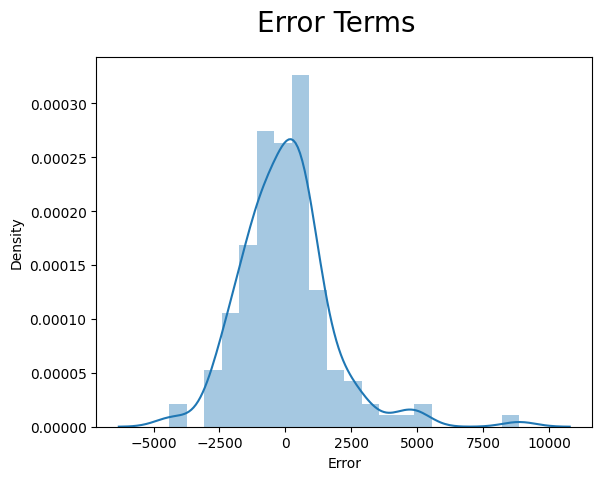

In [53]:
# plotting the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle("Error Terms", fontsize=20)
plt.xlabel("Error", fontsize=10)

In [54]:
#Predicting and Evaluating using Test data

# dividing into x and y

y_test = df_test.pop("price")
x_test = df_test[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'fueleconomy', 'gas', 'turbo', 'hardtop',
       'hatchback', 'sedan', 'fwd', 'rwd', 'dohcv', 'ohc', 'ohcv', 'five',
       'four', 'six', 'twelve', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge',
       'honda', 'jaguar', 'mazda', 'mitsubishi', 'nissan', 'plymouth',
       'porcshce', 'rear', '2bbl', 'mpfi']]

In [55]:
x_train.columns

Index(['const', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'fueleconomy', 'gas', 'turbo',
       'hardtop', 'hatchback', 'sedan', 'fwd', 'rwd', 'dohcv', 'ohc', 'ohcv',
       'five', 'four', 'six', 'twelve', 'audi', 'bmw', 'buick', 'chevrolet',
       'dodge', 'honda', 'jaguar', 'mazda', 'mitsubishi', 'nissan', 'plymouth',
       'porcshce', 'rear', '2bbl', 'mpfi'],
      dtype='object')

In [56]:
# adding constant

x_test_new = pd.DataFrame(sm.add_constant(x_test))

In [57]:
x_test_new

,const,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,fueleconomy,gas,...,honda,jaguar,mazda,mitsubishi,nissan,plymouth,porcshce,rear,2bbl,mpfi
160,1.0,0.265306,0.341732,0.200000,0.132148,0.082969,0.515873,0.116129,1.000000,1,...,0,0,0,0,0,0,0,0,1,0
186,1.0,0.311953,0.426772,0.315789,0.219125,0.131004,0.515873,0.212903,0.561694,1,...,0,0,0,0,0,0,0,0,0,1
59,1.0,0.355685,0.522835,0.421053,0.271985,0.187773,0.674603,0.206452,0.508287,1,...,0,0,1,0,0,0,0,0,1,0
165,1.0,0.230321,0.379528,0.157895,0.214320,0.082969,0.555556,0.387097,0.458564,1,...,0,0,0,0,0,0,0,0,0,1
140,1.0,0.195335,0.200000,0.136842,0.202307,0.126638,0.857143,0.135484,0.491713,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,1.0,0.486880,0.472441,0.221053,0.344065,0.187773,0.634921,0.232258,0.434622,1,...,0,0,0,0,0,0,0,0,1,0
29,1.0,0.271137,0.450394,0.400000,0.476694,0.336245,0.841270,0.600000,0.233886,1,...,0,0,0,0,0,0,0,0,0,0
182,1.0,0.311953,0.426772,0.315789,0.212398,0.078603,0.373016,0.000000,0.963168,0,...,0,0,0,0,0,0,0,0,0,0
40,1.0,0.288630,0.485039,0.000000,0.265738,0.135371,0.484127,0.219355,0.545120,1,...,1,0,0,0,0,0,0,0,0,0


In [58]:
# now lets use our model ro make prediction
y_pred = model1.predict(x_test_new)

In [59]:
#Model Performance Comparison between train and test(Generalisation)

from sklearn.metrics import r2_score
print("Test Peresiction R-Squr:", r2_score(y_test, y_pred))

Test Peresiction R-Squr: 0.8538694771638995


In [60]:
print("Train Peresiction R-Squr:", r2_score(y_train, y_train_price))

Train Peresiction R-Squr: 0.9511693301741702


<ipython-input-61-944f4157bbce>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred, bins=30)


Text(0.5, 0, 'Errors')

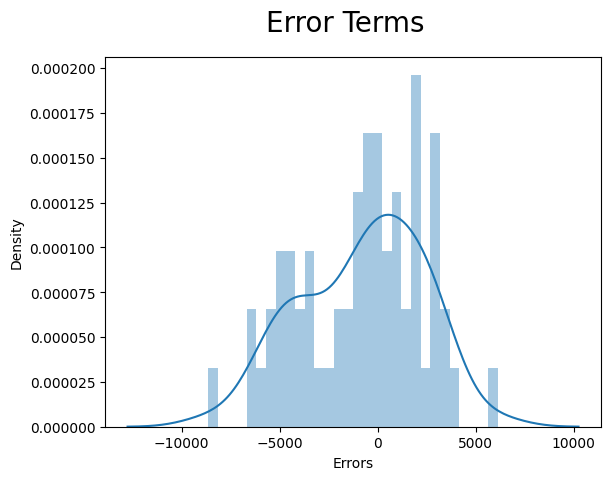

In [61]:
#Residual Normality

# plot thr histogram of the error term

fig = plt.figure()
sns.distplot(y_test-y_pred, bins=30)
fig.suptitle("Error Terms", fontsize=20)
plt.xlabel("Errors", fontsize=10)

Text(0, 0.5, 'y_pred')

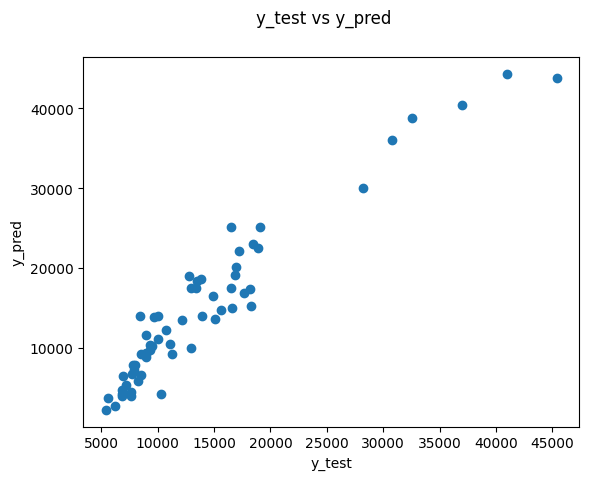

In [62]:
# evaliuation of the model
# ploting y_test against y_pred tp underdtand thr spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle("y_test vs y_pred")
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [63]:
#Final Model

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     55.28
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           8.28e-54
Time:                        19:59:08   Log-Likelihood:                -1268.2
No. Observations:                 143   AIC:                             2612.
Df Residuals:                     105   BIC:                             2725.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7305.7113   3113.062      2.347      